<a href="https://colab.research.google.com/github/pachterlab/JBMMCKP_2023/blob/main/notebooks/cdx-libd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install necessary packages if runnning on colab. 

In [1]:
#!pip install scipy
#!pip install anndata
#!pip install scanpy
#!pip install concordex

In [2]:
import sys, os
import pandas as pd 

import anndata
import scanpy as sc 
from concordex.tools import calculate_concordex

from scipy.cluster.vq import kmeans2

import warnings
warnings.filterwarnings("ignore")

Data in this example is availabile at the following link: [https://caltech.box.com/v/concordex-data](https://caltech.box.com/v/concordex-data)

Assumes the following file structure:
<pre>
|-- parent  
|   |-- notebooks 
|   |   |-- cdx-libd.ipynb 
|   |-- data 
|   |   |-- visium 
|   |   |   |-- 151675 
|   |   |   |   |-- visium_processed.h5ad 
|   |   |   |-- 151676 
|   |   |   |   |-- ....
|   |   |-- .... 
</pre>

In [3]:
result_name = "visium"
sample_id = "151675"

data_dir = "../data"
full_data_dir = os.path.join(data_dir,result_name, sample_id)

Load Data

In [4]:
adata = sc.read_h5ad(os.path.join(full_data_dir, 'visium_processed.h5ad'))

In [5]:
adata.var_names_make_unique()
adata.layers["counts"] = adata.X.copy()

In [6]:
adata.obs['in_tissue'] =adata.obs['in_tissue'].astype(bool)

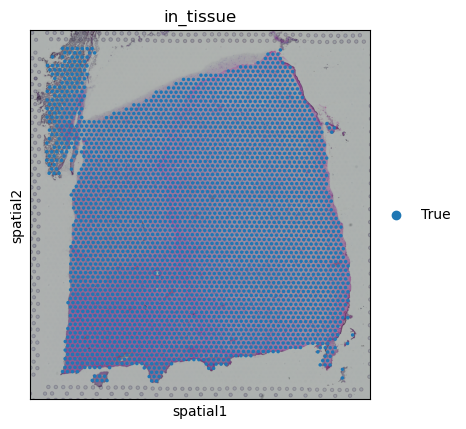

In [7]:
sc.pl.spatial(adata, color="in_tissue")

In [8]:
# Setup concordex params
n_shrs = 7
label = "X_pca"
use_rep = "spatial"
n_neighbors = 12

calculate_concordex(
        adata, label, 
        use_rep=use_rep, 
        n_neighbors=n_neighbors
)

use_louvain=False
if use_louvain: 
    sc.pp.neighbors(adata, use_rep="X_nbc")
    sc.tl.louvain(adata, resolution=louvain_resolution)
    
else:
    _, shr = kmeans2(adata.obsm['X_nbc'], n_shrs)
    adata.obs['shr'] = pd.Categorical(shr)

Computing nearest neighbors...

Computing neighborhood consolidation matrix...



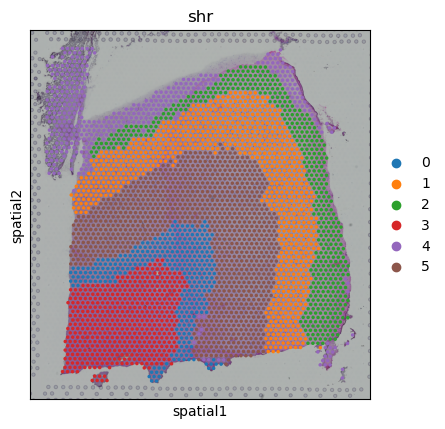

In [9]:
sc.pl.spatial(adata, color='shr')